# Interpreting Large Language Models with Soft Entropy

There are major questions about multi-linguality from both a cognitive perspective and a typological perspective. An advantage of working with large language models is that they allow you to look at what happens inside the model on a representational level as it processes a sentence. We've prepared a number of datasets and models for you to look at, all listed in the ```1_resources.ipynb``` notebook. A description of the measures can be found in the file ```3_entropy_explanation.ipynb``` or in [this paper](https://arxiv.org/pdf/2406.02449).



In [1]:
#We import a class for analysing BERT models and an entropy estimator
from h import BERTAnalyser, Estimator

In [2]:
languages = ['french', 'german', 'finnish', 'romanian', 'danish', 'spanish']

In [3]:
save_path = 'results' #path where JSON file with results should be written
model_id = 'distilbert/distilbert-base-multilingual-cased' #hugging face model id
task_repo, subtask_name = 'hcoxec/english_100k', None #hugging face model repo and substask names
n_batches, batch_size = 10, 256 #how many batches of data to analyse, and sentences per batch
device = 'cuda:0' #torch device to load model into usually cpu or cuda:0
cache_dir = 'model_cache' #path to directory where model files should be saved

In [4]:
#these additional logs will also be written to the results file, to help
#keep track of variables later
additional_logs = {
    "model" : 'm_bert',
    "n_examples" : n_batches*batch_size,
}

In [5]:
h_estimator = Estimator() #instantiates and Entropy estimator
analyser = BERTAnalyser( #intantiants an analyser and loads the bert model into memory
    device=device,
    h_estimator=h_estimator, 
    model_id=model_id, 
    results_file_name=save_path,
    cache_dir=cache_dir
)
analyser.get_dataset(task_repo, subtask_name) #downloads the dataset
train_loader = analyser.get_dataloader(bs=batch_size, pos_labels='small') #packages the dataset into batches


In [15]:
h_estimator.reset() #clears the probability table from the estimator to start a new analysis
results_dict, results_df  = analyser.online_estimation( #runs online entropy estimation for the number of batches specified
    train_loader, 
    max_batches=n_batches, 
    additional_logs= additional_logs,
    label_types=['language', 'token','bigram','trigram',]

)
results_df

Encoding | hcoxec/english_100k:   0%|          | 0/10 [00:00<?, ?it/s]

,variation,residual,disentanglement,regularity,label
overall,0.712382,0.284820,0.000000,0.000000,overall
language,0.584293,0.179804,0.306824,0.128089,language
token,0.331893,0.354304,0.478420,0.380489,token
bigram,0.250979,0.113583,0.224712,0.461403,bigram
trigram,0.202901,0.067489,0.254903,0.509481,trigram


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont

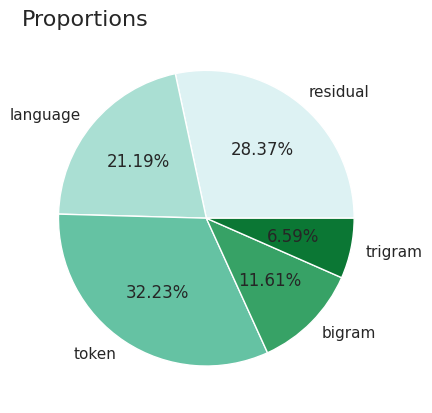

In [10]:
analyser.plot_residual(results_df) #builds a pie chart of the residual

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont

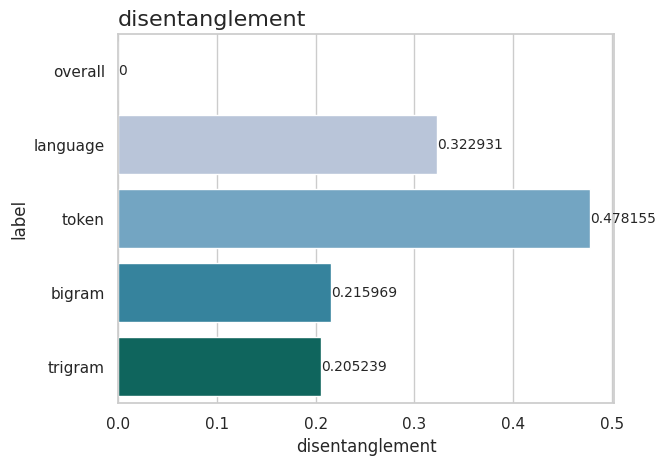

In [11]:
analyser.plot(results_df, measure='disentanglement') #generates a bar plot of any measure

In [ ]:
import pandas as pd

#loads all saved results into a dataframe for analysis
df = pd.read_json('results.json', lines=True)
